--- Schritt 2: 'Schmutzigen' Rohdatensatz laden ---
Datensatz geladen: rfd_main.csv
Dimensionen (Zeilen, Spalten): (1326, 15)

--- Schritt 3: Zielspalten definieren, begründen und auf NaN prüfen ---
Prüfung auf fehlende Werte (NaN) in den Zielspalten:
replies    0
views      0
votes      0
dtype: int64

STATUS: Keine fehlenden Werte (NaN) in den Zielspalten gefunden. Die IQR-Methode kann direkt angewendet werden.

--- Schritt 4: IQR-Methode anwenden ---

Starte IQR-Analyse für Zielspalten:
  Analysiere Spalte: 'replies'
    Q1: 5.00, Q3: 45.00, IQR: 40.00
    Untere Grenze: -55.00
    Obere Grenze: 105.00
    -> Gefundene Ausreißer: 143 Zeilen
  Analysiere Spalte: 'views'
    Q1: 2191.75, Q3: 11146.25, IQR: 8954.50
    Untere Grenze: -11240.00
    Obere Grenze: 24578.00
    -> Gefundene Ausreißer: 171 Zeilen
  Analysiere Spalte: 'votes'
    Q1: 1.00, Q3: 14.00, IQR: 13.00
    Untere Grenze: -18.50
    Obere Grenze: 33.50
    -> Gefundene Ausreißer: 146 Zeilen
--------------------------

C:\Users\merdan\AppData\Local\Temp\ipykernel_11912\1751898373.py:197: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot_data = ax.boxplot(
C:\Users\merdan\AppData\Local\Temp\ipykernel_11912\1751898373.py:197: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot_data = ax.boxplot(
C:\Users\merdan\AppData\Local\Temp\ipykernel_11912\1751898373.py:197: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot_data = ax.boxplot(


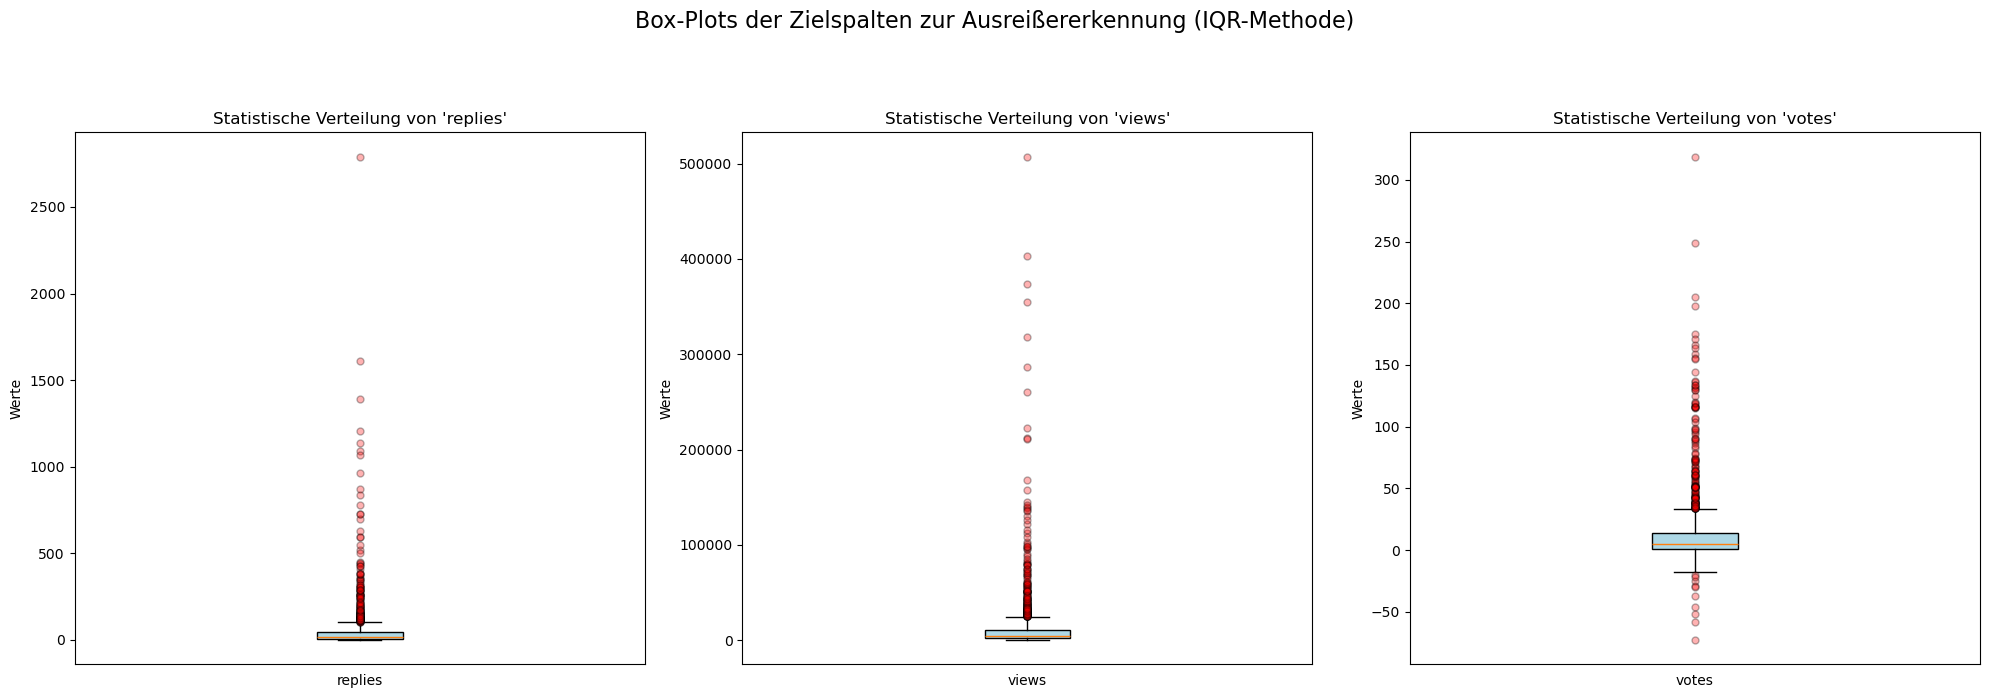


Visuelle Bestätigung:
Die Plots bestätigen die statistischen Berechnungen aus Schritt 4.
-> 'replies' und 'views' zeigen extrem komprimierte Boxen nahe Null, was den niedrigen IQR belegt. Die überwiegende Mehrheit der roten Punkte (Ausreißer) liegt weit über der oberen Grenze.
-> 'votes' zeigt ebenfalls eine komprimierte Box sowie Ausreißer in beide Richtungen (positiv und negativ), was die in Schritt 3 (Begründung) festgestellten Min/Max-Werte visuell bestätigt.

--- Schritt 6: Ergebnisse speichern und Zusammenfassung ---
Dieses Skript (02) ist nun abgeschlossen.

Ergebnisse wurden in 'ergebnisse/1.1_iqr_ausreisser_indizes.csv' gespeichert.

--- ZUSAMMENFASSUNG EXPERIMENT 1.1 (IQR) ---
Methode:           Traditioneller IQR (1.5-fache Regel)
Zieldaten:         rfd_main.csv (Shape: (1326, 15))
Zielspalten:       ['replies', 'views', 'votes']
Gesamt-Ausreißer:  235 (mind. eine Spalte)
Ausreißer in replies: 143
Ausreißer in views: 171
Ausreißer in votes: 146


In [1]:
################################################################################
# MASTERARBEIT - SKRIPT 02:
# EXPERIMENT 1.1 (Forschungsfrage 1) - AUSREISSERERKENNUNG (IQR)
################################################################################
#
# ZWECK DIESES SKRIPTS (Methodik gem. Abschnitt 3.3.1):
#
# 1. (Laden): Lädt den 'schmutzigen' Rohdatensatz (rfd_main.csv), 
#             der in der EDA (Skript 01) analysiert wurde.
#
# 2. (Zielspalten): Fokussiert sich auf die Spalten der Forschungsfrage 1 (Ausreißer)
#    'replies', 'views', 'votes'.
#
# 3. (Methode): Wendet die erste traditionelle Methode an:
#    IQR (Interquartilsabstand) .
#
# 4. (Detektion): Führt die Ausreißererkennung für die Zielspalten durch 
#    und identifiziert die Indizes der Datenpunkte, die laut IQR als 
#    Ausreißer gelten.
#
# 5. (Visualisierung): Erstellt Box-Plots für die Zielspalten, um 
#    die statistische Verteilung und die Ausreißer visuell zu bestätigen.
#
# 6. (Speichern): Speichert die identifizierten Ausreißer-Indizes.
#
################################################################################

# Schritt 1: Notwendige Bibliotheken importieren
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
#
################################################################################

# SCHRITT 2: Laden des 'schmutzigen' Rohdatensatzes
print("--- Schritt 2: 'Schmutzigen' Rohdatensatz laden ---")

# Gemäß ZWECK-Schritt 1 wird der 'schmutzige' Rohdatensatz (rfd_main.csv) geladen.
dateipfad = 'rfd_main.csv'
df_schmutzig = pd.read_csv(dateipfad)

# Die .shape-Ausgabe bestätigt die Dimensionen des Datensatzes.
# Dies ist ein Kontrollschritt, um sicherzustellen, dass die korrekte Datei 
# mit allen 1326 Zeilen geladen wurde
print(f"Datensatz geladen: {dateipfad}")
print(f"Dimensionen (Zeilen, Spalten): {df_schmutzig.shape}")
print("=" * 70)
#
################################################################################

# SCHRITT 3: Zielspalten definieren, begründen und auf NaN prüfen
print("\n--- Schritt 3: Zielspalten definieren, begründen und auf NaN prüfen ---")

# --- BEGRÜNDUNG DER SPALTENAUSWAHL (basierend auf EDA Skript 01, Schritt 4) ---
#
# Die EDA-Analyse (.describe()) hat VIER numerische Spalten gezeigt: 
# 'Unnamed: 0', 'replies', 'views', und 'votes'.
#
# 1. AUSGESCHLOSSENE SPALTE ('Unnamed: 0'): 
#    Diese Spalte wird von der Analyse ausgeschlossen. Ihr Name ('Unnamed: 0') 
#    deutet stark darauf hin, dass es sich um einen irrelevanten Index handelt, 
#    der beim Export der CSV-Datei entstanden ist. Sie besitzt keinen 
#    inhaltlichen Wert für die Beantwortung der Forschungsfrage 1.
#
# 2. AUSGEWÄHLTE SPALTEN ('replies', 'views', 'votes'): 
#    Diese DREI Spalten werden ausgewählt. Die EDA-Statistik hat hier 
#    eindeutige Hinweise auf problematische statistische Ausreißer geliefert:
#
#    - Logische Fehler (Negativwerte): 'replies' (min: -1.0) und 
#      'votes' (min: -73.0) enthalten ungültige negative Werte.
#    - Extreme Maximalwerte: 'views' (max: 507393.0) und 'replies' (max: 2791.0) 
#      weisen im Vergleich zu ihren Medianen (50%) extrem hohe Maximalwerte auf.
#
# Diese drei Spalten sind daher die primären und relevanten Ziele für die 
# IQR-Ausreißererkennung gemäß Forschungsfrage 1.
# --- ENDE DER BEGRÜNDUNG ---

zielspalten = ['replies', 'views', 'votes']

# Methodische Prüfung auf NaN-Werte (Wissenschaftliche Sorgfalt):
# Obwohl die EDA (Skript 01) 'non-null' anzeigte, wird hier explizit die 
# Voraussetzung für die IQR-Anwendung (keine NaNs) überprüft.
print("Prüfung auf fehlende Werte (NaN) in den Zielspalten:")
fehlende_werte = df_schmutzig[zielspalten].isnull().sum()
print(fehlende_werte)

if fehlende_werte.sum() > 0:
    print("\nWARNUNG: Es wurden fehlende Werte gefunden. Diese müssen vor der \
IQR-Berechnung behandelt werden (z.B. durch Entfernen oder Imputation).")
else:
    print("\nSTATUS: Keine fehlenden Werte (NaN) in den Zielspalten gefunden. \
Die IQR-Methode kann direkt angewendet werden.")

print("=" * 70)
#
################################################################################

# SCHRITT 4: Definition und Anwendung der IQR-Methode
print("\n--- Schritt 4: IQR-Methode anwenden ---")

# Gemäß ZWECK-Schritt 3 und der in Abschnitt 2.2.1.2 dargelegten Methodik
# wird die IQR-Methode implementiert.
#
# Die "gängige Faustregel" zur Identifizierung von Ausreißern wird verwendet:
# Ein Wert gilt als Ausreißer, wenn er unter der 'Unteren_Grenze' oder 
# über der 'Oberen_Grenze' liegt.
#
# Formeln (vgl. Abschnitt 2.2.1.2):
# Untere_Grenze = Q1 - (1.5 * IQR)
# Obere_Grenze = Q3 + (1.5 * IQR)

def finde_ausreisser_iqr(daten, spalte):
    """
    Identifiziert Ausreißer in einer Spalte eines DataFrames mittels der 
    1.5*IQR-Regel.
    Gibt die Indizes der als Ausreißer identifizierten Zeilen zurück.
    """
    print(f"  Analysiere Spalte: '{spalte}'")
    
    # 1. Berechne Q1 (25. Perzentil) und Q3 (75. Perzentil)
    Q1 = daten[spalte].quantile(0.25)
    Q3 = daten[spalte].quantile(0.75)
    
    # 2. Berechne den Interquartilsabstand (IQR)
    IQR = Q3 - Q1
    
    # 3. Definiere die Grenzen
    untere_grenze = Q1 - (1.5 * IQR)
    obere_grenze = Q3 + (1.5 * IQR)
    
    print(f"    Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"    Untere Grenze: {untere_grenze:.2f}")
    print(f"    Obere Grenze: {obere_grenze:.2f}")
    
    # 4. Finde die Indizes der Ausreißer
    ausreisser_indizes = daten[
        (daten[spalte] < untere_grenze) | 
        (daten[spalte] > obere_grenze)
    ].index
    
    print(f"    -> Gefundene Ausreißer: {len(ausreisser_indizes)} Zeilen")
    return ausreisser_indizes

# --- ANWENDUNG AUF ZIELSPALTEN ---

# Wir wenden die Funktion auf jede Zielspalte an.
# Die Indizes aller gefundenen Ausreißer werden in einem Set gespeichert,
# um Duplikate zu vermeiden (falls eine Zeile in mehreren Spalten ein 
# Ausreißer ist).
print("\nStarte IQR-Analyse für Zielspalten:")

ausreisser_pro_spalte = {}

for spalte in zielspalten:
    indizes = finde_ausreisser_iqr(df_schmutzig, spalte)
    ausreisser_pro_spalte[spalte] = sorted(list(indizes))

print("-" * 40)
for spalte in zielspalten:
    print(f"Anzahl Ausreißer in '{spalte}': {len(ausreisser_pro_spalte[spalte])}")
print("=" * 70)

#
################################################################################

# SCHRITT 5: Visualisierung der Ausreißer (Box-Plots)
print("\n--- Schritt 5: Visualisierung der Ausreißer (Box-Plots) ---")

# Gemäß ZWECK-Schritt 5 werden nun die Box-Plots für die Zielspalten erstellt.
# Diese Visualisierung ist der methodische Standard für die IQR-Analyse 
# und dient als visueller Beleg für die in Schritt 4 berechneten Ausreißer.
#
# Die Punkte (Flier), die außerhalb der "Antennen" (Whiskers) liegen, 
# repräsentieren die Datenpunkte, die von der 1.5*IQR-Regel als Ausreißer 
# identifiziert wurden.
#
# Wir erwarten, basierend auf der EDA (Skript 01, Schritt 4) und den 
# Berechnungen (Skript 02, Schritt 4), eine sehr "gequetschte" Box 
# (geringer IQR) und eine große Anzahl extremer Ausreißer.

print(f"Erstelle Box-Plots für die {len(zielspalten)} Zielspalten...")

# Erstellen eines Rasters für die Plots (1 Zeile, 3 Spalten)
fig, axes = plt.subplots(nrows=1, ncols=len(zielspalten), figsize=(20, 7))

# Setzen eines Haupttitels für die gesamte Abbildung
fig.suptitle('Box-Plots der Zielspalten zur Ausreißererkennung (IQR-Methode)', 
             fontsize=16, y=1.02)

for i, spalte in enumerate(zielspalten):
    ax = axes[i]
    
    # Erstellen des Box-Plots für die aktuelle Spalte.
    # 'flierprops' wird verwendet, um die Ausreißer deutlich (hier rot) 
    # hervorzuheben.
    box_plot_data = ax.boxplot(
        df_schmutzig[spalte], 
        vert=True,          # Vertikale Ausrichtung
        patch_artist=True,  # Ermöglicht das Füllen der Box (für Farbe)
        labels=[spalte],    # Setzt das Label für die X-Achse
        flierprops=dict(
            marker='o', 
            markerfacecolor='red', 
            markersize=5, 
            alpha=0.3      # Transparenz für überlappende Punkte
        )
    )
    
    # Box-Farbe setzen (optional, aber schöner)
    for patch in box_plot_data['boxes']:
        patch.set_facecolor('lightblue')
    
    ax.set_title(f"Statistische Verteilung von '{spalte}'")
    ax.set_ylabel("Werte")
    # Deaktiviert die X-Achsen-Striche, da der Label bereits gesetzt ist
    ax.tick_params(axis='x', which='both', bottom=False)

# Optimiert das Layout, um Überlappungen zu verhindern
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("\nVisuelle Bestätigung:")
print("Die Plots bestätigen die statistischen Berechnungen aus Schritt 4.")
print("-> 'replies' und 'views' zeigen extrem komprimierte Boxen nahe Null, \
was den niedrigen IQR belegt. Die überwiegende Mehrheit der roten Punkte \
(Ausreißer) liegt weit über der oberen Grenze.")
print("-> 'votes' zeigt ebenfalls eine komprimierte Box sowie Ausreißer in \
beide Richtungen (positiv und negativ), was die in Schritt 3 \
(Begründung) festgestellten Min/Max-Werte visuell bestätigt.")
print("=" * 70)
#
################################################################################

# SCHRITT 6: Ergebnisse speichern und Zusammenfassung
print("\n--- Schritt 6: Ergebnisse speichern und Zusammenfassung ---")
print("Dieses Skript (02) ist nun abgeschlossen.")

os.makedirs('ergebnisse', exist_ok=True)

# Alle relevanten Indizes zusammenführen (Zeilen, die in mindestens einer Spalte Ausreißer sind)

alle_ausreisser = set()
for spalte in zielspalten:
    alle_ausreisser.update(ausreisser_pro_spalte[spalte])

# DataFrame: Zeilen = Ausreißer-Indizes, Spalten = Flags pro Zielspalte
df_ergebnisse_iqr = pd.DataFrame(
    sorted(list(alle_ausreisser)),
    columns=['Index']
)

for spalte in zielspalten:
    df_ergebnisse_iqr[f'is_outlier_{spalte}'] = df_ergebnisse_iqr['Index'].isin(
        ausreisser_pro_spalte[spalte]
    )

ergebnis_dateipfad = 'ergebnisse/1.1_iqr_ausreisser_indizes.csv'
df_ergebnisse_iqr.to_csv(ergebnis_dateipfad, index=False)

print(f"\nErgebnisse wurden in '{ergebnis_dateipfad}' gespeichert.")

print("\n--- ZUSAMMENFASSUNG EXPERIMENT 1.1 (IQR) ---")
print(f"Methode:           Traditioneller IQR (1.5-fache Regel)")
print(f"Zieldaten:         {dateipfad} (Shape: {df_schmutzig.shape})")
print(f"Zielspalten:       {zielspalten}")
print(f"Gesamt-Ausreißer:  {len(alle_ausreisser)} (mind. eine Spalte)")
for spalte in zielspalten:
    print(f"Ausreißer in {spalte}: {len(ausreisser_pro_spalte[spalte])}")
print("=" * 70)
#
################################################################################